# Loading the Data

In [1]:
# Import the pandas library
import pandas as pd

# Load the dataset
data = pd.read_csv("pima_diabetes.csv")

# Display the first few rows of the dataset
print(data.head())


   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0


# Set column names

In [2]:
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data.columns = column_names

# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(data.describe())


Basic statistics of the dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   767.000000  767.000000     767.000000     767.000000  767.000000   
mean      3.842243  120.859192      69.101695      20.517601   79.903520   
std       3.370877   31.978468      19.368155      15.954059  115.283105   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   32.000000   
75%       6.000000  140.000000      80.000000      32.000000  127.500000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  767.000000                767.000000  767.000000  767.000000  
mean    31.990482                  0.471674   33.219035    0.348110  
std      7.889091                  0.331497   11.752296    0.476682  
m

# Generating Pairplot

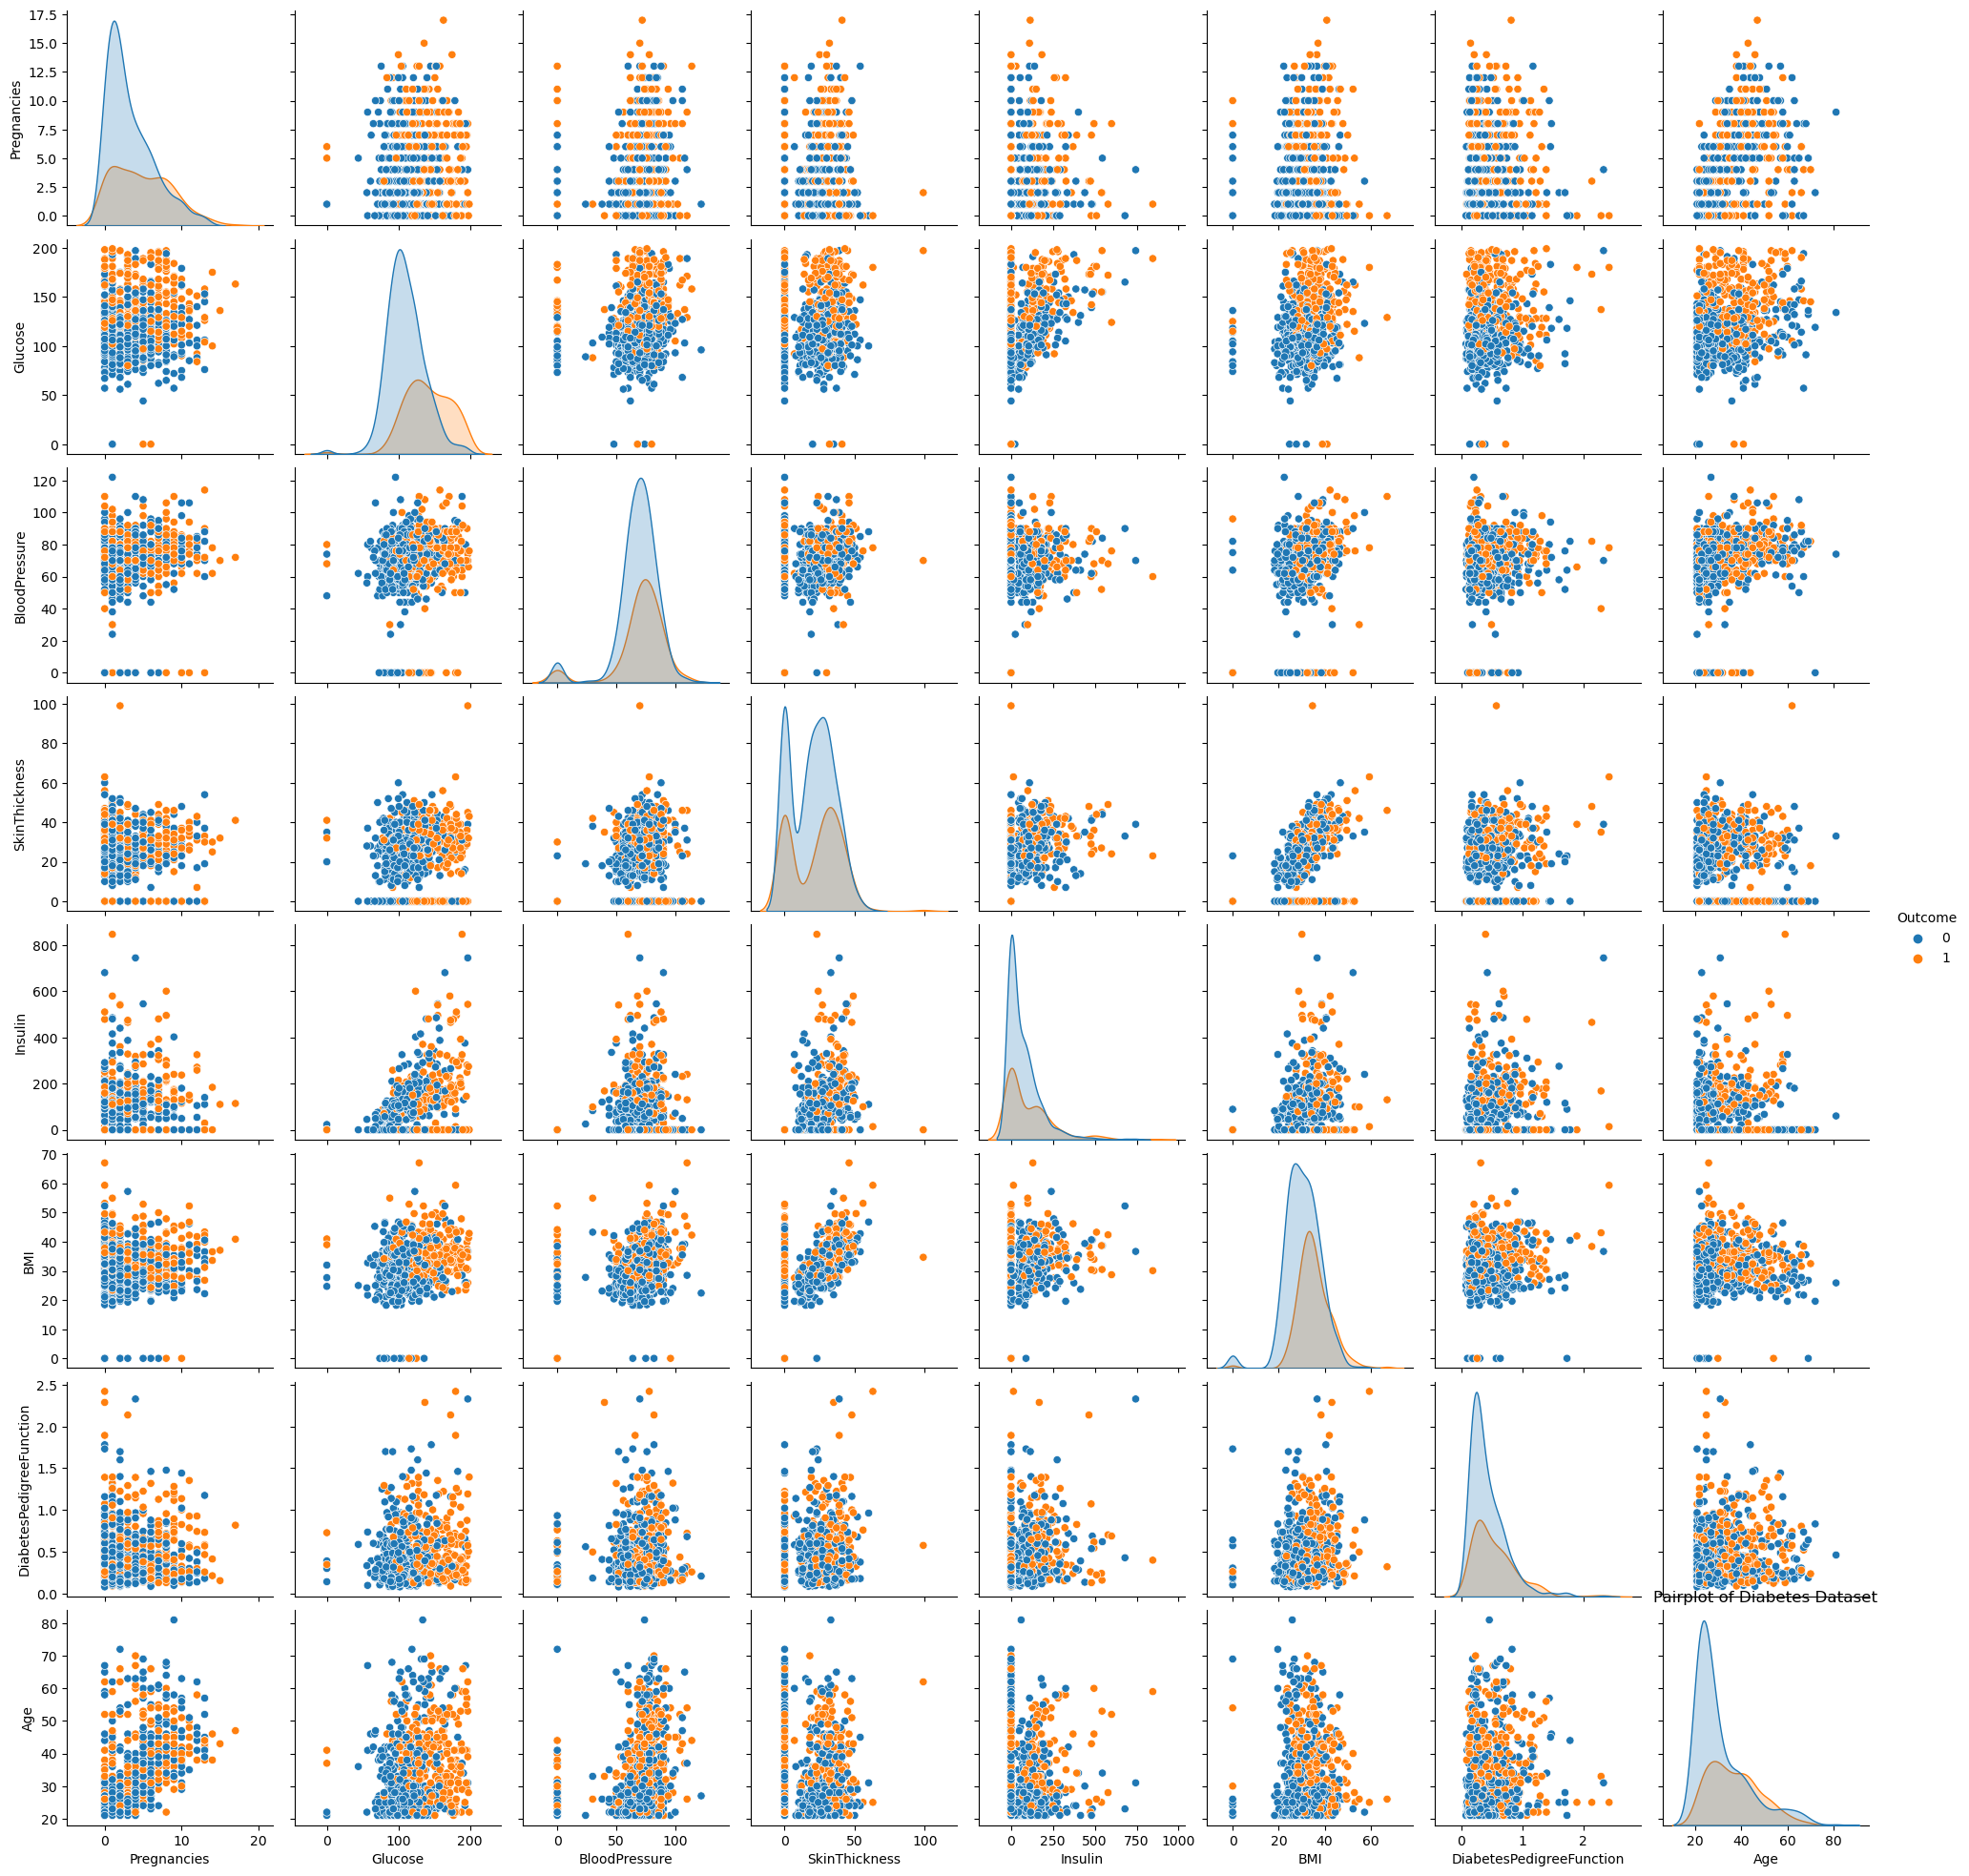

In [3]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Generate pairplot to visualize relationships between features
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.title('Pairplot of Diabetes Dataset')
plt.show()

# Pairplot Data

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              1       85             66             29        0  26.6   
1              8      183             64              0        0  23.3   
2              1       89             66             23       94  28.1   
3              0      137             40             35      168  43.1   
4              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
762           10      101             76             48      180  32.9   
763            2      122             70             27        0  36.8   
764            5      121             72             23      112  26.2   
765            1      126             60              0        0  30.1   
766            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.351   31        0  
1                  

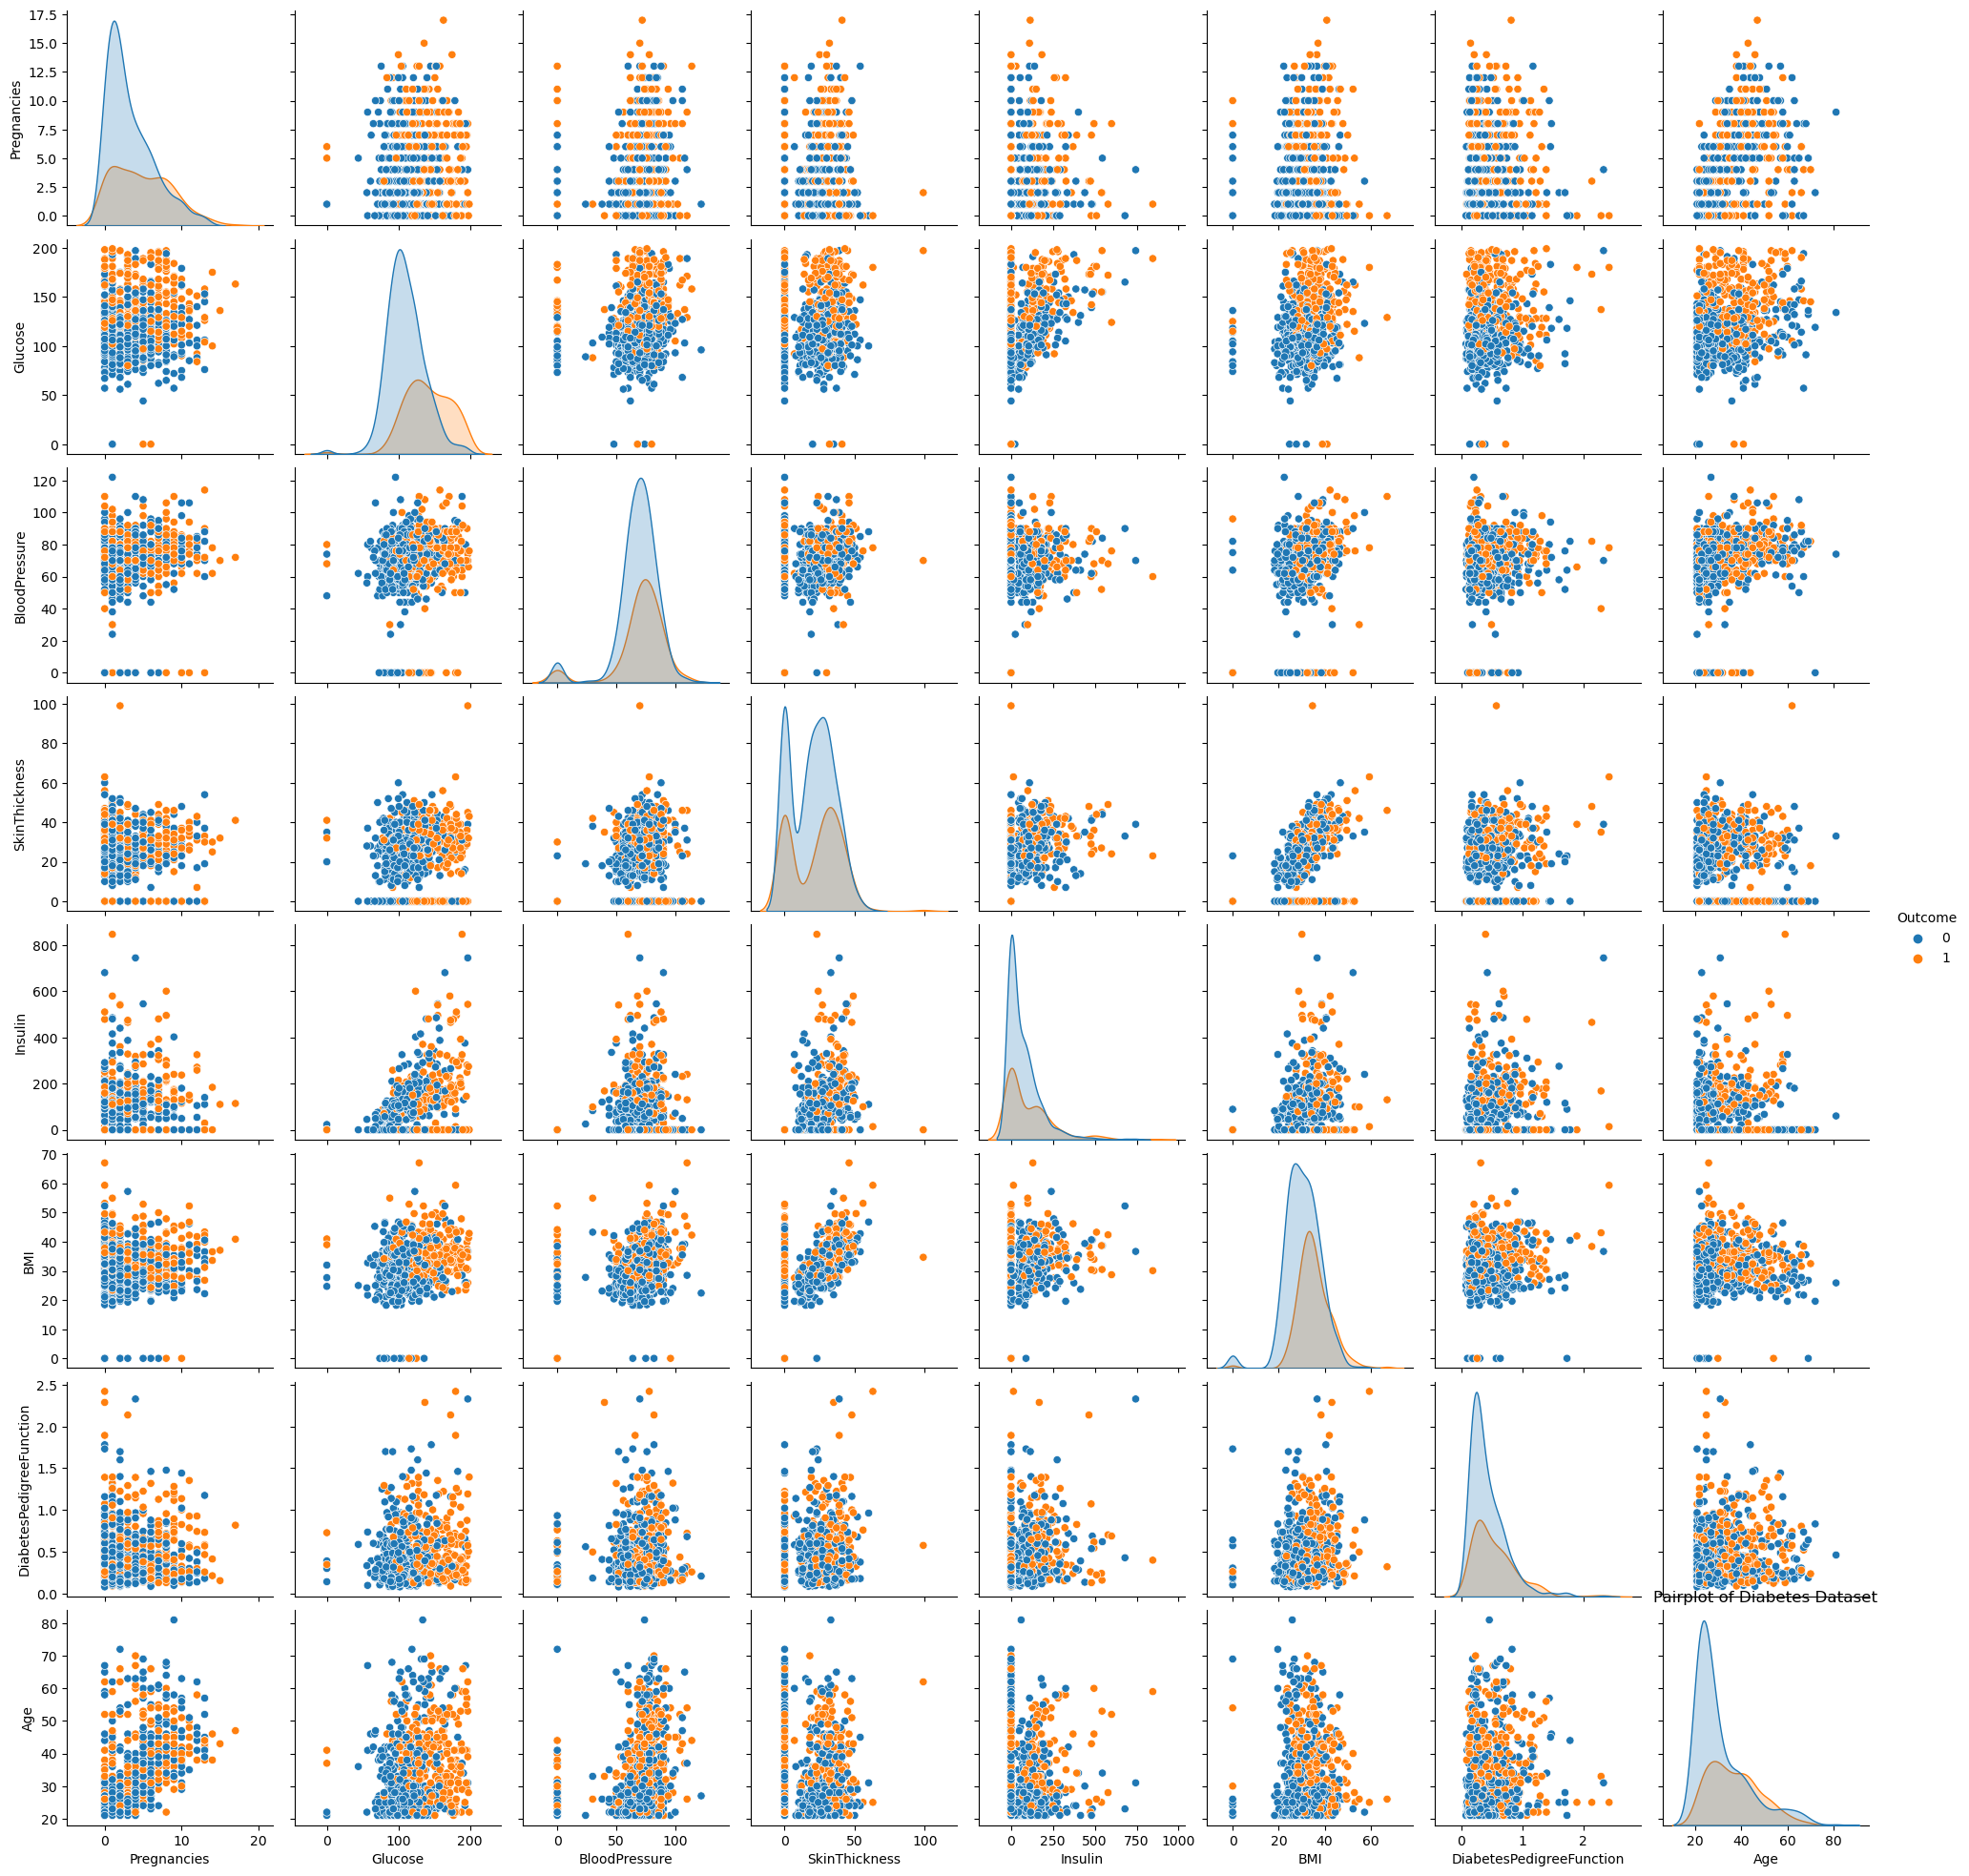

In [6]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Generate pairplot to visualize relationships between features
pairplot = sns.pairplot(data, hue='Outcome', diag_kind='kde')

# Get the data used to create the pairplot
pairplot_data = pairplot.data

# Print the data used for pairplot
print(pairplot_data)

# Show the pairplot
plt.title('Pairplot of Diabetes Dataset')
plt.show()


# Generating Correlation Heatmap

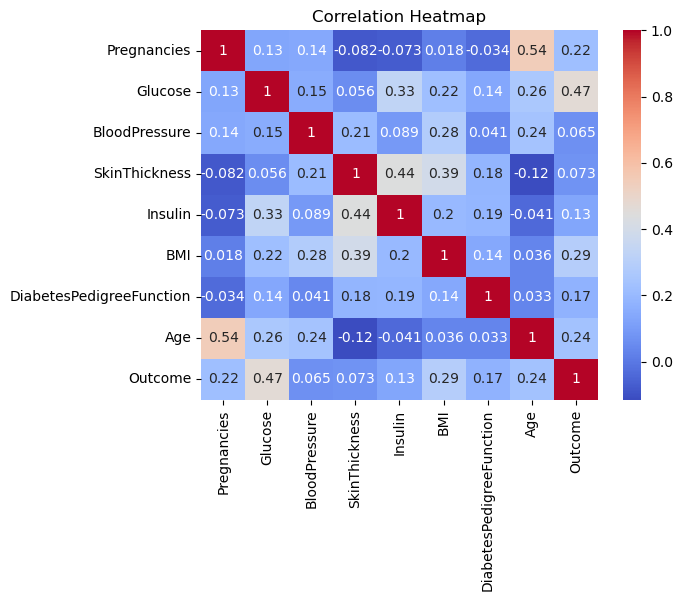

In [7]:
# Generate correlation heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data For Correlation Heatmap

In [8]:
# Generate correlation matrix
correlation_matrix = data.corr()

# Print correlation matrix
print(correlation_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128846       0.141197      -0.082495   
Glucose                      0.128846  1.000000       0.152498       0.056381   
BloodPressure                0.141197  0.152498       1.000000       0.207308   
SkinThickness               -0.082495  0.056381       0.207308       1.000000   
Insulin                     -0.072999  0.332383       0.089098       0.437974   
BMI                          0.017518  0.220955       0.281777       0.392553   
DiabetesPedigreeFunction    -0.033927  0.136903       0.041180       0.183498   
Age                          0.544018  0.262408       0.239571      -0.115873   
Outcome                      0.221087  0.465856       0.064882       0.073265   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.072999  0.017518                 -0.033927   
Glucose                   0.332383  0.220

# Generating Boxplots

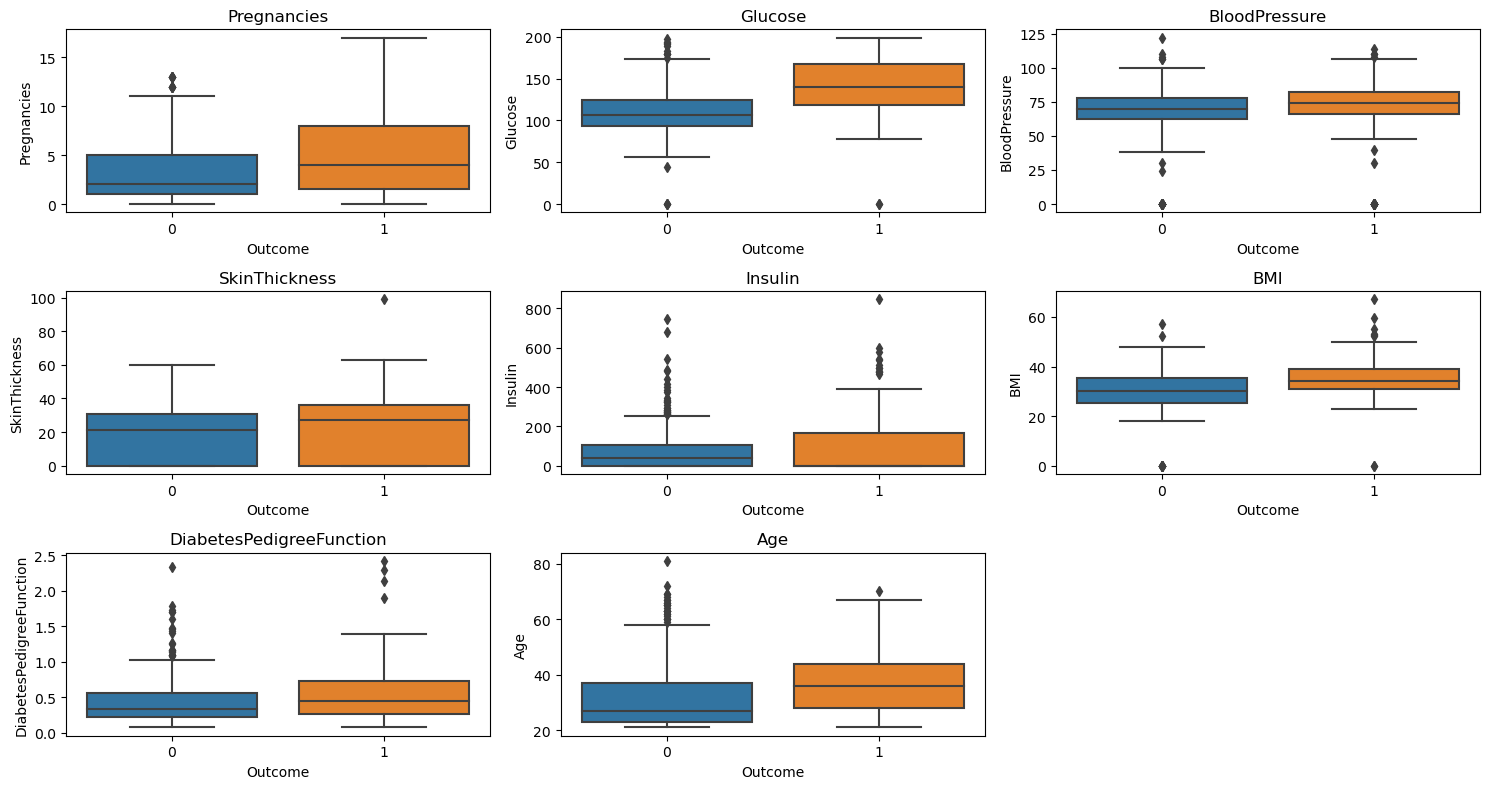

In [9]:
# Generate boxplot for each feature
plt.figure(figsize=(15, 8))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.title(column)
plt.tight_layout()
plt.show()

# Boxplot Data

In [10]:
# Extract necessary columns for box plot
boxplot_data = data.drop(columns='Outcome')

# Print box plot data
print(boxplot_data)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              1       85             66             29        0  26.6   
1              8      183             64              0        0  23.3   
2              1       89             66             23       94  28.1   
3              0      137             40             35      168  43.1   
4              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
762           10      101             76             48      180  32.9   
763            2      122             70             27        0  36.8   
764            5      121             72             23      112  26.2   
765            1      126             60              0        0  30.1   
766            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.351   31  
1                       0.672   32  


# Class Distribution

In [11]:
# Class distribution
class_distribution = data['Outcome'].value_counts()
print(class_distribution)

0    500
1    267
Name: Outcome, dtype: int64


# T-test for Feature Comparison

In [12]:
from scipy.stats import ttest_ind

# Example: T-test for 'Glucose' between diabetic and non-diabetic groups
diabetic_group = data[data['Outcome'] == 1]['Glucose']
non_diabetic_group = data[data['Outcome'] == 0]['Glucose']
t_statistic, p_value = ttest_ind(diabetic_group, non_diabetic_group)
print("T-test for 'Glucose':")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-test for 'Glucose':
T-statistic: 14.561546656934002
P-value: 1.4091419155146758e-42


# Chi-square Test of Independence

In [13]:
from scipy.stats import chi2_contingency

# Example: Chi-square test for independence between 'Outcome' and 'Age'
crosstab = pd.crosstab(data['Outcome'], pd.cut(data['Age'], bins=3))
chi2_statistic, p_value, dof, expected = chi2_contingency(crosstab)
print("Chi-square test for independence between 'Outcome' and 'Age':")
print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)

Chi-square test for independence between 'Outcome' and 'Age':
Chi-square statistic: 36.61766513993896
P-value: 1.1183430541831683e-08


# Model Training

In [15]:
# Import necessary libraries for model development
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Outcome'), data['Outcome'], test_size=0.2, random_state=42)

# Initialize and train logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Initialize and train decision tree classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Initialize and train random forest classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Initialize and train support vector machine classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [17]:
# Access support vector coefficients
support_vector_coefficients = svm_model.dual_coef_
print("Support vector coefficients:", support_vector_coefficients)

Support vector coefficients: [[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -0.20215096
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -

In [21]:
from sklearn.model_selection import cross_val_score

models = [logistic_regression_model, decision_tree_model, random_forest_model, svm_model]

# Loop through each model and perform cross-validation to obtain performance metrics
for model in models:
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
    recall_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    
    # Print the average scores for each model
    print("Model:", model.__class__.__name__)
    print("Average Accuracy:", accuracy_scores.mean())
    print("Average Precision:", precision_scores.mean())
    print("Average Recall:", recall_scores.mean())
    print("Average F1-score:", f1_scores.mean())
    print("\n")


Model: LogisticRegression
Average Accuracy: 0.7617886178861788
Average Precision: 0.7020155695765452
Average Recall: 0.5428571428571429
Average F1-score: 0.608635433839033


Model: DecisionTreeClassifier
Average Accuracy: 0.7079701452752233
Average Precision: 0.6008081995038517
Average Recall: 0.5761904761904761
Average F1-score: 0.5608521416229327


Model: RandomForestClassifier
Average Accuracy: 0.7275089964014395
Average Precision: 0.665066045066045
Average Recall: 0.5095238095238096
Average F1-score: 0.5788674236061533


Model: SVC
Average Accuracy: 0.7373717179794749
Average Precision: 0.6967207792207792
Average Recall: 0.4142857142857143
Average F1-score: 0.5168622380376112




In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Assuming 'data' contains your DataFrame with the provided column names
# Define features (X) and target variable (y) using positional indices
X = data.iloc[:, :8]  # Assuming the first 8 columns are features
y = data.iloc[:, 8]   # Assuming the last column is the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and scale the logistic regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression_model = LogisticRegression(max_iter=1000)

# Train logistic regression model
logistic_regression_model.fit(X_train_scaled, y_train)

# Initialize other models
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
svm_model = SVC()

# Train other models
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC()

In [35]:
# Predictions using logistic regression model
y_pred_logistic_regression = logistic_regression_model.predict(X_test_scaled)

# Predictions using decision tree model
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Predictions using random forest model
y_pred_random_forest = random_forest_model.predict(X_test)

# Predictions using SVM model
y_pred_svm = svm_model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluation of logistic regression model
accuracy_lr = accuracy_score(y_test, y_pred_logistic_regression)
precision_lr = precision_score(y_test, y_pred_logistic_regression)
recall_lr = recall_score(y_test, y_pred_logistic_regression)
f1_lr = f1_score(y_test, y_pred_logistic_regression)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_logistic_regression)


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions using logistic regression model
y_pred_logistic_regression = logistic_regression_model.predict(X_test_scaled)

# Predictions using decision tree model
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Predictions using random forest model
y_pred_random_forest = random_forest_model.predict(X_test)

# Predictions using SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluation of logistic regression model
accuracy_lr = accuracy_score(y_test, y_pred_logistic_regression)
precision_lr = precision_score(y_test, y_pred_logistic_regression)
recall_lr = recall_score(y_test, y_pred_logistic_regression)
f1_lr = f1_score(y_test, y_pred_logistic_regression)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_logistic_regression)

# Evaluation of decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_decision_tree)
precision_dt = precision_score(y_test, y_pred_decision_tree)
recall_dt = recall_score(y_test, y_pred_decision_tree)
f1_dt = f1_score(y_test, y_pred_decision_tree)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_decision_tree)

# Evaluation of random forest model
accuracy_rf = accuracy_score(y_test, y_pred_random_forest)
precision_rf = precision_score(y_test, y_pred_random_forest)
recall_rf = recall_score(y_test, y_pred_random_forest)
f1_rf = f1_score(y_test, y_pred_random_forest)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_random_forest)

# Evaluation of SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print results
print("Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)
print("Confusion Matrix:\n", confusion_matrix_lr)
print("\n")

print("Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
print("Confusion Matrix:\n", confusion_matrix_dt)
print("\n")

print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("\n")

print("SVM:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)
print("Confusion Matrix:\n", confusion_matrix_svm)

Logistic Regression:
Accuracy: 0.8116883116883117
Precision: 0.7916666666666666
Recall: 0.6666666666666666
F1-score: 0.7238095238095237
Confusion Matrix:
 [[87 10]
 [19 38]]


Decision Tree:
Accuracy: 0.6753246753246753
Precision: 0.5538461538461539
Recall: 0.631578947368421
F1-score: 0.5901639344262295
Confusion Matrix:
 [[68 29]
 [21 36]]


Random Forest:
Accuracy: 0.7922077922077922
Precision: 0.711864406779661
Recall: 0.7368421052631579
F1-score: 0.7241379310344828
Confusion Matrix:
 [[80 17]
 [15 42]]


SVM:
Accuracy: 0.7727272727272727
Precision: 0.7619047619047619
Recall: 0.5614035087719298
F1-score: 0.6464646464646465
Confusion Matrix:
 [[87 10]
 [25 32]]
